In [1]:
""" Neural Network.
A 2-Hidden Layers Fully Connected Neural Network (a.k.a Multilayer Perceptron)
implementation with TensorFlow. This example is using the MNIST database
of handwritten digits (http://yann.lecun.com/exdb/mnist/).
Links:
    [MNIST Dataset](http://yann.lecun.com/exdb/mnist/).
Author: Aymeric Damien
Project: https://github.com/aymericdamien/TensorFlow-Examples/
"""

from __future__ import print_function
from sklearn.model_selection import train_test_split

import pandas
import tensorflow as tf
import numpy as np

# read data
data = pandas.read_csv('dir_change.csv')
X = data.iloc[:, 2:171]
Y = data.iloc[:, 1]
x_train, x_test0, y_train, y_test0 = train_test_split(X, Y, test_size=0.3, random_state=100)
x_test, x_validation, y_test, y_validation = train_test_split(x_test0, y_test0, test_size=0.333, random_state=100)

# Parameters
learning_rate = 0.001
num_steps = 20000
batch_size = 32
display_step = 100

# Network Parameters
n_hidden_1 = 64 # 1st layer number of neurons
n_hidden_2 = 10 # 2nd layer number of neurons
# n_hidden_3 = 512 # 3rd layer number of neurons
num_input = 169 
num_classes = 3 # 类别为4(0, 1, 2)

# tf Graph input
X = tf.placeholder("float", [None, num_input])
Y = tf.placeholder("float", [None, num_classes])

# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([num_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
#     'h3': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, num_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
#     'b3': tf.Variable(tf.random_normal([n_hidden_3])),
    'out': tf.Variable(tf.random_normal([num_classes]))
}


# Create model
def neural_net(x):
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    # Output fully connected layer with a neuron for each class
#     layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

# Construct model
logits = neural_net(X)
prediction = tf.nn.softmax(logits)

# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

# Evaluate model
correct_pred = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start training
stepnum = []
minibatch_loss = []
training_accuracy = []
validation_accuracy = []
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    for step in range(1, num_steps+1):
        #batch_x, batch_y = mnist.train.next_batch(batch_size)
        # Run optimization op (backprop)
        # 随机抽样 batch_size个样本
        data_batch = data.sample(batch_size)

        # 抽取特征(1维,长度为4)和标签(1维, 长度为1)
        features = x_train.values # 特征为csv中的第2到第5列 shape = (128, 4)
        labels = y_train.values # 特征为csv中的第6列 shape = (128,1)
        # 此时 features与labels均为numpy数组
        # batch_x 即当前批次的特征
        batch_x = features
        # batch_y 需要将label进行one_hot转换
        batch_y = np.eye(labels.shape[0])[labels][:,0:num_classes]
        
        # validation
        val_features = x_validation.values
        val_labels = y_validation.values
        val_x = val_features
        val_y = np.eye(val_labels.shape[0])[val_labels][:,0:num_classes]
        
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
        if step % display_step == 0 or step == 1:
            # Calculate batch loss and accuracy
            loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x,
                                                                 Y: batch_y})
            val_acc = sess.run(accuracy, feed_dict={X: val_x, Y: val_y})
            stepnum.append(step)
            minibatch_loss.append(loss)
            training_accuracy.append(acc)
            validation_accuracy.append(val_acc)
            print("Step " + str(step) + ", Minibatch Loss= " + \
                  "{:.4f}".format(loss) + ", Training Accuracy= " + \
                  "{:.3f}".format(acc))
            
    test_data = x_test.values
    test_labels = y_test.values
    batch_x = test_data
    batch_y = np.eye(test_labels.shape[0])[test_labels][:,0:num_classes]
    print("Optimization Finished!")
    print("Testing Accuracy:", sess.run(accuracy, feed_dict={X: batch_x, Y: batch_y}))

/Users/wyh/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Step 1, Minibatch Loss= 19.7219, Training Accuracy= 0.255
Step 100, Minibatch Loss= 4.9014, Training Accuracy= 0.627
Step 200, Minibatch Loss= 0.6740, Training Accuracy= 0.784
Step 300, Minibatch Loss= 0.3245, Training Accuracy= 0.892
Step 400, Minibatch Loss= 0.2221, Training Accuracy= 0.931
Step 500, Minibatch Loss= 0.1705, Training Accuracy= 0.951
Step 600, Minibatch Loss= 0.1425, Training Accuracy= 0.961
Step 700, Minibatch Loss= 0.1258, Training Accuracy= 0.971
Step 800, Minibatch Loss= 0.1133, Training Accuracy= 0.971
Step 900, Minibatch Loss= 0.1033, Training Accuracy= 0.971
Step 1000, Minibatch Loss= 0.0949, Training Accuracy= 0.971
Step 1100, Minibatch Loss= 0.0878, Training Accuracy= 0.971
Step 1200, Minibatch Loss= 0.0816, Training Accuracy= 0.980
Step 1300, Minibatch Loss= 0.0761, Train

Step 13000, Minibatch Loss= 0.0000, Training Accuracy= 1.000
Step 13100, Minibatch Loss= 0.0000, Training Accuracy= 1.000
Step 13200, Minibatch Loss= 0.0000, Training Accuracy= 1.000
Step 13300, Minibatch Loss= 0.0000, Training Accuracy= 1.000
Step 13400, Minibatch Loss= 0.0000, Training Accuracy= 1.000
Step 13500, Minibatch Loss= 0.0000, Training Accuracy= 1.000
Step 13600, Minibatch Loss= 0.0000, Training Accuracy= 1.000
Step 13700, Minibatch Loss= 0.0000, Training Accuracy= 1.000
Step 13800, Minibatch Loss= 0.0000, Training Accuracy= 1.000
Step 13900, Minibatch Loss= 0.0000, Training Accuracy= 1.000
Step 14000, Minibatch Loss= 0.0000, Training Accuracy= 1.000
Step 14100, Minibatch Loss= 0.0000, Training Accuracy= 1.000
Step 14200, Minibatch Loss= 0.0000, Training Accuracy= 1.000
Step 14300, Minibatch Loss= 0.0000, Training Accuracy= 1.000
Step 14400, Minibatch Loss= 0.0000, Training Accuracy= 1.000
Step 14500, Minibatch Loss= 0.0000, Training Accuracy= 1.000
Step 14600, Minibatch Lo

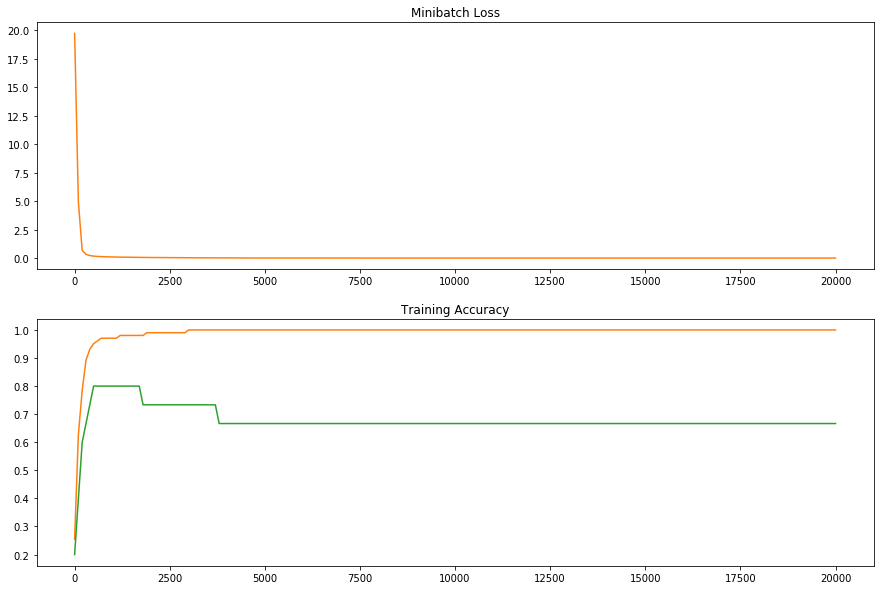

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(15,10))

# ax[0].set_xlim((0, 100000)
# ax[0].set_ylim((0, 1))

# ax[1].set_xlim((0, 100000))
# ax[1].set_ylim((0, max(minibatch_loss)))

ax[0].set_title('Minibatch Loss')
ax[1].set_title('Training Accuracy')

line1, = ax[0].plot([], [], lw=2)
line2, = ax[1].plot([], [], lw=2)
               
ax[0].plot(stepnum, minibatch_loss)
ax[1].plot(stepnum, training_accuracy)
ax[1].plot(stepnum, validation_accuracy)

In [ ]:
# Sequence Generation
net = tflearn.input_data(shape=[None, 100, 5000])
net = tflearn.lstm(net, 64)
net = tflearn.dropout(net, 0.5)
net = tflearn.fully_connected(net, 5000, activation='softmax')
net = tflearn.regression(net, optimizer='adam', loss='categorical_crossentropy')

model = tflearn.SequenceGenerator(net, dictionary=idx, seq_maxlen=100)
model.fit(X, Y)
model.generate(50, temperature=1.0)

In [ ]:
# tf learn
# validation set

In [ ]:
import tflearn
tflearn.init_graph(num_cores=8, gpu_memory_fraction=0.5)

net = tflearn.input_data(shape=[None, 171])
net = tflearn.fully_connected(net, 64)
net = tflearn.dropout(net, 0.5)
net = tflearn.fully_connected(net, 3, activation='softmax')
net = tflearn.regression(net, optimizer='adam', loss='categorical_crossentropy')

model = tflearn.DNN(net)
model.fit(X, Y)